## 連線Colab GPU

In [1]:
# !nvidia-smi

In [2]:
# from tensorflow.python.client import device_lib

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# cd

## Transfer Learning

## VGG16

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

## Read data

In [6]:
from catdog_utilities.catdog_read import read_data, read_image

In [7]:
X_train, y_train = read_data('./crop_dataset/train/', shuffle = True, target_size=(150,150))

./crop_dataset/train/Band to Left
./crop_dataset/train/Band to Right
./crop_dataset/train/Bicycle
./crop_dataset/train/Combined Curve
./crop_dataset/train/Keep Forward
./crop_dataset/train/Keep Left
./crop_dataset/train/Keep Right
./crop_dataset/train/Limit Speed 100
./crop_dataset/train/Limit Speed 30
./crop_dataset/train/Limit Speed 50
./crop_dataset/train/Limit Speed 60
./crop_dataset/train/Limit Speed 70
./crop_dataset/train/Limit Speed 80
./crop_dataset/train/Limit Speed 90
./crop_dataset/train/Narrow Road on Right
./crop_dataset/train/No Entry
./crop_dataset/train/No Overtaking
./crop_dataset/train/Pedestrian
./crop_dataset/train/Stop
./crop_dataset/train/Traffic Signal Ahead
./crop_dataset/train/Turn Left
./crop_dataset/train/Turn Right
./crop_dataset/train/Uneven Road
Processed 0 of 15120
Processed 250 of 15120
Processed 500 of 15120
Processed 750 of 15120
Processed 1000 of 15120
Processed 1250 of 15120
Processed 1500 of 15120
Processed 1750 of 15120
Processed 2000 of 15120
Pro

In [8]:
X_train.shape

(15120, 150, 150, 3)

In [9]:
X_train[0]

array([[[255, 255, 221],
        [255, 255, 221],
        [255, 255, 220],
        ...,
        [123, 109,  83],
        [123, 108,  83],
        [123, 109,  83]],

       [[255, 255, 220],
        [255, 255, 221],
        [255, 255, 220],
        ...,
        [123, 109,  84],
        [123, 109,  83],
        [123, 109,  84]],

       [[255, 255, 221],
        [255, 255, 221],
        [255, 255, 220],
        ...,
        [123, 109,  83],
        [123, 108,  83],
        [123, 109,  83]],

       ...,

       [[255, 255, 215],
        [255, 255, 215],
        [255, 255, 215],
        ...,
        [ 89,  68,  49],
        [ 89,  67,  49],
        [ 89,  68,  49]],

       [[255, 255, 215],
        [255, 255, 215],
        [255, 255, 215],
        ...,
        [ 89,  67,  49],
        [ 88,  67,  49],
        [ 89,  67,  49]],

       [[255, 255, 215],
        [255, 255, 215],
        [255, 255, 215],
        ...,
        [ 89,  68,  49],
        [ 89,  67,  49],
        [ 89,  68,  49]]

In [10]:
y_train[0:10]

(10, 12, 8, 10, 3, 16, 8, 4, 21, 15)

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

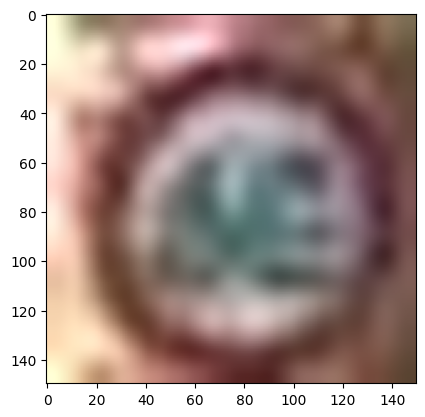

In [12]:
plt.imshow( X_train[0] )

In [13]:
X_train[0].shape

(150, 150, 3)

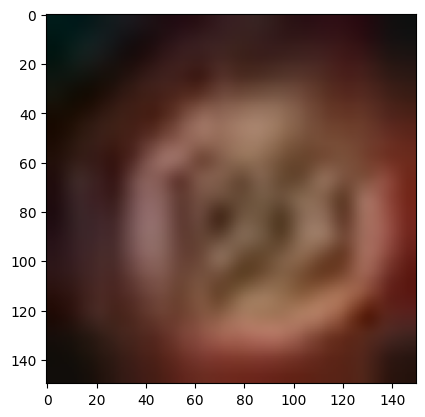

In [14]:
plt.imshow( X_train[1] )

In [15]:
# from tensorflow.keras.utils import to_categorical

In [16]:
# num_classes = 23
# Y_train = to_categorical(y_train, num_classes)
# Y_test = to_categorical(y_test, num_classes)
Y_train = np.asarray(y_train).astype('float32')

In [17]:
Y_train[0:2]

array([10., 12.], dtype=float32)

## Scale-teaching

In [18]:
X_train =  preprocess_input(X_train)

In [19]:
X_train.shape

(15120, 150, 150, 3)

In [20]:
X_train[0]

array([[[117.061    , 138.22101  , 131.32     ],
        [117.061    , 138.22101  , 131.32     ],
        [116.061    , 138.22101  , 131.32     ],
        ...,
        [-20.939003 ,  -7.7789993,  -0.6800003],
        [-20.939003 ,  -8.778999 ,  -0.6800003],
        [-20.939003 ,  -7.7789993,  -0.6800003]],

       [[116.061    , 138.22101  , 131.32     ],
        [117.061    , 138.22101  , 131.32     ],
        [116.061    , 138.22101  , 131.32     ],
        ...,
        [-19.939003 ,  -7.7789993,  -0.6800003],
        [-20.939003 ,  -7.7789993,  -0.6800003],
        [-19.939003 ,  -7.7789993,  -0.6800003]],

       [[117.061    , 138.22101  , 131.32     ],
        [117.061    , 138.22101  , 131.32     ],
        [116.061    , 138.22101  , 131.32     ],
        ...,
        [-20.939003 ,  -7.7789993,  -0.6800003],
        [-20.939003 ,  -8.778999 ,  -0.6800003],
        [-20.939003 ,  -7.7789993,  -0.6800003]],

       ...,

       [[111.061    , 138.22101  , 131.32     ],
        [11

## Read dase model

In [21]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [22]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## Input Layer

In [23]:
base_model.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_1')>

In [24]:
base_model.input_shape

(None, 150, 150, 3)

## Output Layer

In [25]:
base_model.output

<KerasTensor: shape=(None, 4, 4, 512) dtype=float32 (created by layer 'block5_pool')>

In [26]:
base_model.output_shape

(None, 4, 4, 512)

In [27]:
base_model.output_shape[1:]

(4, 4, 512)

## Get the feature of a picture. There are 512 4*4 features in total.

In [28]:
img_file = './crop_dataset/train/Stop/Stop_1.jpg'
#mg_file = 'elephant.jpg'
img = image.load_img(img_file, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

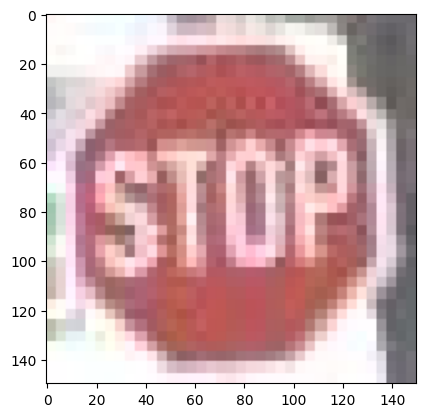

In [29]:
plt.imshow(img)

In [30]:
x

array([[[[142.061    , 130.22101  , 131.32     ],
         [142.061    , 130.22101  , 131.32     ],
         [142.061    , 130.22101  , 131.32     ],
         ...,
         [  6.060997 , -11.778999 , -16.68     ],
         [  6.060997 , -11.778999 , -16.68     ],
         [  6.060997 , -11.778999 , -16.68     ]],

        [[142.061    , 130.22101  , 131.32     ],
         [142.061    , 130.22101  , 131.32     ],
         [142.061    , 130.22101  , 131.32     ],
         ...,
         [  6.060997 , -11.778999 , -16.68     ],
         [  6.060997 , -11.778999 , -16.68     ],
         [  6.060997 , -11.778999 , -16.68     ]],

        [[142.061    , 130.22101  , 131.32     ],
         [142.061    , 130.22101  , 131.32     ],
         [142.061    , 130.22101  , 131.32     ],
         ...,
         [  6.060997 , -11.778999 , -16.68     ],
         [  6.060997 , -11.778999 , -16.68     ],
         [  6.060997 , -11.778999 , -16.68     ]],

        ...,

        [[151.061    , 137.22101  , 13

In [31]:
features = base_model.predict(x)

1/1 [==============================] - 0s 476ms/step


In [32]:
features

array([[[[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  9.678304,
           0.      ]],

        [[ 0.      ,  0.      ,  0.      , ...,  0.      , 13.896838,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ]],

        [[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
      

In [33]:
features.shape[1:]

(4, 4, 512)

# Transfer Learning of the model to combine with my model of VGG16


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Model

In [35]:
g = base_model.output
g = Flatten( input_shape = base_model.output_shape[1:])(g) 
g = Dense(256, activation="relu")(g)
g = Dropout(0.5)(g)
predictions = Dense(23, activation="softmax")(g)

# creating the final model 
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## Freeze the weights (parameters) of the first 15 layers

In [36]:
for layer in model.layers[:15]:
    layer.trainable = False

## Compile model

In [37]:
from tensorflow.keras.optimizers import SGD
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

# Model Training--Check and EarlyStopping

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [39]:
best_model_filepath = './best_cnn_vgg16-model.hdf5'
checkpoint = ModelCheckpoint(
    filepath=best_model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
)

In [40]:
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    verbose=1, 
    restore_best_weights=True)

# Model Training

In [41]:
%%time
hist = model.fit(
    X_train, 
    Y_train, # 注意:
    batch_size=32, 
    epochs= 200, 
    validation_split=0.1, 
    verbose=1, 
    callbacks=[checkpoint, early_stopping])

Epoch 1/200
426/426 [==============================] - 575s 1s/step - loss: 1.9545 - accuracy: 0.4441 - val_loss: 0.5988 - val_accuracy: 0.8214
Epoch 2/200
426/426 [==============================] - 559s 1s/step - loss: 0.4717 - accuracy: 0.8458 - val_loss: 0.2641 - val_accuracy: 0.9193
Epoch 3/200
426/426 [==============================] - 565s 1s/step - loss: 0.2370 - accuracy: 0.9267 - val_loss: 0.2122 - val_accuracy: 0.9372
Epoch 4/200
426/426 [==============================] - 552s 1s/step - loss: 0.1496 - accuracy: 0.9511 - val_loss: 0.1252 - val_accuracy: 0.9630
Epoch 5/200
426/426 [==============================] - 548s 1s/step - loss: 0.0990 - accuracy: 0.9696 - val_loss: 0.1133 - val_accuracy: 0.9669
Epoch 6/200
426/426 [==============================] - 549s 1s/step - loss: 0.0758 - accuracy: 0.9777 - val_loss: 0.0987 - val_accuracy: 0.9762
Epoch 7/200
426/426 [==============================] - 548s 1s/step - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.0992 - val_accuracy:

In [43]:
%%time
y_proba = model.predict(X_train)

473/473 [==============================] - 468s 987ms/step
CPU times: total: 1h 24min 58s
Wall time: 8min


In [45]:
y_pred = np.argmax(y_proba, axis=1)

In [46]:
y_pred

array([10, 12,  8, ..., 12, 20,  8], dtype=int64)

In [48]:
print(y_train)

(10, 12, 8, 10, 3, 16, 8, 4, 21, 15, 11, 8, 11, 15, 10, 7, 12, 5, 8, 6, 11, 16, 18, 9, 16, 9, 4, 11, 7, 21, 8, 10, 7, 9, 17, 4, 6, 5, 7, 12, 6, 6, 9, 11, 22, 12, 12, 5, 16, 9, 19, 4, 2, 6, 18, 4, 8, 11, 8, 9, 12, 10, 10, 7, 11, 12, 8, 9, 12, 7, 11, 8, 11, 15, 16, 6, 16, 12, 21, 21, 11, 12, 9, 6, 14, 8, 12, 6, 15, 16, 4, 7, 15, 21, 12, 6, 18, 4, 18, 15, 2, 15, 12, 6, 20, 16, 7, 15, 8, 1, 18, 10, 6, 10, 18, 17, 7, 21, 6, 15, 6, 9, 12, 10, 0, 6, 16, 19, 11, 16, 12, 20, 5, 7, 10, 18, 8, 12, 16, 10, 20, 11, 6, 7, 7, 9, 22, 16, 12, 12, 22, 8, 19, 9, 5, 4, 6, 6, 11, 11, 12, 11, 6, 11, 4, 8, 17, 6, 11, 11, 8, 21, 6, 12, 13, 9, 3, 14, 19, 16, 14, 8, 14, 8, 6, 12, 10, 13, 9, 9, 10, 9, 12, 10, 12, 18, 16, 12, 11, 15, 21, 8, 11, 9, 8, 12, 15, 6, 19, 11, 8, 11, 4, 6, 12, 6, 6, 10, 6, 7, 8, 7, 9, 16, 12, 15, 8, 11, 7, 19, 18, 8, 12, 9, 10, 8, 6, 15, 15, 7, 18, 5, 11, 6, 14, 16, 4, 6, 11, 0, 6, 12, 10, 9, 6, 21, 4, 18, 14, 16, 6, 9, 10, 12, 6, 7, 6, 9, 16, 9, 16, 7, 22, 7, 7, 6, 6, 8, 12, 8, 21, 8, 1

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_train, y_pred=y_pred) 

In [50]:
accuracy

0.9984126984126984

# Plotting observed best epochs

In [51]:
from matplotlib import pyplot as plt
%matplotlib inline

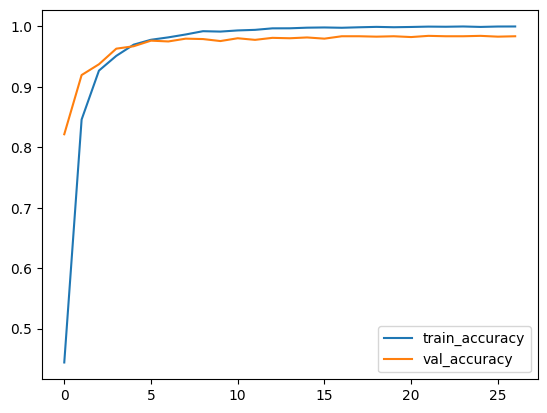

In [52]:
plt.plot(hist.history['accuracy'], label="train_accuracy")
plt.plot(hist.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

## Predict on new data

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [112]:
data_dir = read_data('./crop_dataset/train/', shuffle = True, target_size=(150,150))

./crop_dataset/train/Band to Left
./crop_dataset/train/Band to Right
./crop_dataset/train/Bicycle
./crop_dataset/train/Combined Curve
./crop_dataset/train/Keep Forward
./crop_dataset/train/Keep Left
./crop_dataset/train/Keep Right
./crop_dataset/train/Limit Speed 100
./crop_dataset/train/Limit Speed 30
./crop_dataset/train/Limit Speed 50
./crop_dataset/train/Limit Speed 60
./crop_dataset/train/Limit Speed 70
./crop_dataset/train/Limit Speed 80
./crop_dataset/train/Limit Speed 90
./crop_dataset/train/Narrow Road on Right
./crop_dataset/train/No Entry
./crop_dataset/train/No Overtaking
./crop_dataset/train/Pedestrian
./crop_dataset/train/Stop
./crop_dataset/train/Traffic Signal Ahead
./crop_dataset/train/Turn Left
./crop_dataset/train/Turn Right
./crop_dataset/train/Uneven Road
Processed 0 of 15120
Processed 250 of 15120
Processed 500 of 15120
Processed 750 of 15120
Processed 1000 of 15120
Processed 1250 of 15120
Processed 1500 of 15120
Processed 1750 of 15120
Processed 2000 of 15120
Pro

In [143]:
class_names = ['Band to Left','Band to Right', 'Bicycle', 'Combined Curve', 'Keep Forward', 'Keep Left', 'Keep Right', 'Limit Speed 100', 'Limit Speed 30', 'Limit Speed 50', 'Limit Speed 60', 'Limit Speed 70', 'Limit Speed 80', 'Limit Speed 90', 'Narrow Road on Right', 'No Entry', 'No Overtaking', 'Pedestrian', 'Stop', 'Traffic Signal Ahead', 'Turn Left', 'Turn Right', 'Uneven Road']

['Band to Left', 'Band to Right', 'Bicycle', 'Combined Curve', 'Keep Forward', 'Keep Left', 'Keep Right', 'Limit Speed 100', 'Limit Speed 30', 'Limit Speed 50', 'Limit Speed 60', 'Limit Speed 70', 'Limit Speed 80', 'Limit Speed 90', 'Narrow Road on Right', 'No Entry', 'No Overtaking', 'Pedestrian', 'Stop', 'Traffic Signal Ahead', 'Turn Left', 'Turn Right', 'Uneven Road']


1/1 [==============================] - 0s 71ms/step
This image most likely belongs to Turn Right with a 10.92 percent confidence.


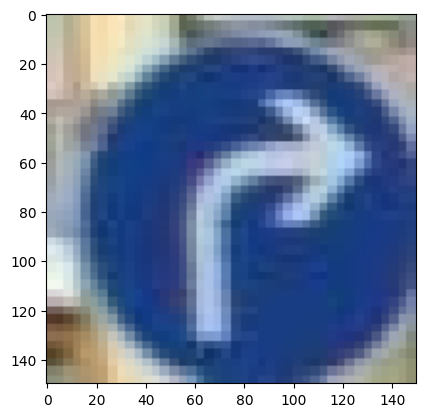

In [151]:
img_file = './test_data/00021.jpg'
img = image.load_img(img_file, target_size=(150, 150))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

plt.imshow(img)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# Save and read the best model

In [152]:
from tensorflow.keras.models import load_model

In [179]:
model.save('my_VGG16_TrafficSignal_model.h5')